<a href="https://colab.research.google.com/github/Desmond-Tiny/Deep-Learning/blob/main/dl01_s05_nil_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train_all,y_train_all),(x_test,y_test) = cifar10.load_data()


In [ ]:
X_train_all.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## Exam:



- input (?)

- output (10)


2 different networks:
1. 1 hidden layer (256)
2. 3 hidden layers (512,512,1024)


### activation functions:
- relu
- softmax


### compile

- loss: 'categorical_crossentropy'
- optimizer: 'adam'

In [ ]:
X_train,y_train = X_train_all[:-10000],y_train_all[:-10000]
X_valid,y_valid=X_train_all[-10000:],y_train_all[-10000:]

In [ ]:
X_train.shape

(40000, 32, 32, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Flatten

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
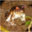

In [ ]:
X_train[0]

In [ ]:
np.max(X_train)

255

In [ ]:
np.min(X_train)

0

In [ ]:
X_train,X_valid,x_test = X_train/255.0,X_valid/255.,x_test/255.

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train,y_valid,y_test=to_categorical(y_train,10),to_categorical(y_valid,10),to_categorical(y_test,10)

In [ ]:
X_train.shape

(40000, 32, 32, 3)

In [ ]:
model1=tf.keras.Sequential()

In [ ]:
#X_train.reshape(-1,32*32*3).shape
#model1.add(Input(shape=(32*32*3)))

In [ ]:
model1.add(Flatten(input_shape=(32,32,3)))

In [ ]:

model1.add(Dense(256,activation='relu'))
model1.add(Dense(10,activation='softmax'))



In [ ]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model1.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_valid,y_valid))

Epoch 1/10
1250/1250 [==============================] - 7s 4ms/step - loss: 1.9084 - accuracy: 0.3187 - val_loss: 1.8842 - val_accuracy: 0.3342
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7354 - accuracy: 0.3806 - val_loss: 1.7208 - val_accuracy: 0.3925
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6695 - accuracy: 0.4070 - val_loss: 1.7032 - val_accuracy: 0.4011
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6297 - accuracy: 0.4182 - val_loss: 1.6721 - val_accuracy: 0.4004
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6006 - accuracy: 0.4275 - val_loss: 1.6256 - val_accuracy: 0.4249
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5821 - accuracy: 0.4350 - val_loss: 1.6569 - val_accuracy: 0.4122
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5617 - accuracy: 0.4413 - val_loss: 1.5974 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_proba=model1.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
preds=y_proba.argmax(axis=-1)
preds

array([3, 9, 8, ..., 3, 5, 7])

In [ ]:
y_true=y_test.argmax(axis=-1)

In [ ]:
print(classification_report(y_true,preds))

              precision    recall  f1-score   support

           0       0.59      0.41      0.49      1000
           1       0.65      0.36      0.47      1000
           2       0.33      0.23      0.27      1000
           3       0.26      0.46      0.33      1000
           4       0.49      0.27      0.35      1000
           5       0.35      0.34      0.35      1000
           6       0.49      0.44      0.47      1000
           7       0.50      0.53      0.51      1000
           8       0.53      0.65      0.58      1000
           9       0.43      0.66      0.52      1000

    accuracy                           0.44     10000
   macro avg       0.46      0.44      0.43     10000
weighted avg       0.46      0.44      0.43     10000



In [ ]:
model1.count_params()

789258

In [ ]:
model2=tf.keras.Sequential()
model2.add(Flatten(input_shape=(32,32,3)))
model2.add(Dense(512,activation='relu'))
model2.add(Dense(512,activation='relu'))
model2.add(Dense(1024,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model2.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_valid,y_valid))

Epoch 1/10
1250/1250 [==============================] - 15s 9ms/step - loss: 1.8679 - accuracy: 0.3211 - val_loss: 1.7463 - val_accuracy: 0.3712
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7061 - accuracy: 0.3865 - val_loss: 1.6930 - val_accuracy: 0.3902
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6254 - accuracy: 0.4159 - val_loss: 1.6815 - val_accuracy: 0.4106
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5771 - accuracy: 0.4320 - val_loss: 1.6052 - val_accuracy: 0.4292
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5426 - accuracy: 0.4435 - val_loss: 1.5758 - val_accuracy: 0.4420
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5031 - accuracy: 0.4602 - val_loss: 1.5684 - val_accuracy: 0.4358
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4746 - accuracy: 0.4678 - val_loss: 1.5348 - val_accuracy

In [ ]:
y_proba=model2.predict(x_test)
preds=y_proba.argmax(axis=-1)
y_true=y_test.argmax(axis=-1)
print(classification_report(y_true,preds))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.58      0.46      0.51      1000
           1       0.63      0.54      0.58      1000
           2       0.41      0.07      0.11      1000
           3       0.28      0.33      0.30      1000
           4       0.46      0.29      0.35      1000
           5       0.29      0.52      0.37      1000
           6       0.51      0.38      0.44      1000
           7       0.42      0.59      0.49      1000
           8       0.56      0.61      0.59      1000
           9       0.46      0.61      0.52      1000

    accuracy                           0.44     10000
   macro avg       0.46      0.44      0.43     10000
weighted avg       0.46      0.44      0.43     10000



In [ ]:
model2.count_params()

2371594

### CNN

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D

In [ ]:
model3=tf.keras.Sequential()

model3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Flatten())
model3.add(Dense(64,activation='relu'))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(10,activation='softmax'))
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model3.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_valid,y_valid))

Epoch 1/10
1250/1250 [==============================] - 10s 5ms/step - loss: 1.5304 - accuracy: 0.4417 - val_loss: 1.2521 - val_accuracy: 0.5555
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1431 - accuracy: 0.5956 - val_loss: 1.0848 - val_accuracy: 0.6154
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9663 - accuracy: 0.6605 - val_loss: 1.0901 - val_accuracy: 0.6225
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8451 - accuracy: 0.7050 - val_loss: 1.0363 - val_accuracy: 0.6465
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7497 - accuracy: 0.7368 - val_loss: 1.0022 - val_accuracy: 0.6636
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6570 - accuracy: 0.7685 - val_loss: 1.1036 - val_accuracy: 0.6421
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5695 - accuracy: 0.7993 - val_loss: 1.0514 - val_accuracy

In [ ]:
y_proba=model3.predict(x_test)
preds=y_proba.argmax(axis=-1)
y_true=y_test.argmax(axis=-1)
print(classification_report(y_true,preds))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.70      0.68      1000
           1       0.83      0.64      0.72      1000
           2       0.51      0.56      0.53      1000
           3       0.49      0.42      0.45      1000
           4       0.57      0.60      0.59      1000
           5       0.56      0.52      0.54      1000
           6       0.80      0.65      0.72      1000
           7       0.65      0.73      0.69      1000
           8       0.74      0.76      0.75      1000
           9       0.64      0.80      0.71      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000



**Fashion Mnist**

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(x_train,y_train),(x_test,y_test) = fashion_mnist
# Conv2D: 32,64,32
# MaxPool2D: (2,2)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
np.max(x_train)

255

In [ ]:
from tensorflow.keras.utils import to_categorical
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)


              precision    recall  f1-score   support

           0       0.83      0.79      0.80      1000
           1       0.99      0.96      0.97      1000
           2       0.68      0.87      0.76      1000
           3       0.85      0.84      0.85      1000
           4       0.83      0.64      0.72      1000
           5       0.97      0.96      0.97      1000
           6       0.66      0.67      0.67      1000
           7       0.95      0.95      0.95      1000
           8       0.96      0.97      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000




In [ ]:
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


y_pred = np.argmax(model.predict(x_test), axis=-1)
y_test_labels = np.argmax(y_test, axis=-1)


print("Classification report:")
print(classification_report(y_test_labels, y_pred))

Epoch 1/10
1500/1500 [==============================] - 14s 6ms/step - loss: 0.4494 - accuracy: 0.8376 - val_loss: 0.3078 - val_accuracy: 0.8917
Epoch 2/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2783 - accuracy: 0.8989 - val_loss: 0.2646 - val_accuracy: 0.9031
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2314 - accuracy: 0.9164 - val_loss: 0.2393 - val_accuracy: 0.9111
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1953 - accuracy: 0.9272 - val_loss: 0.2519 - val_accuracy: 0.9082
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1656 - accuracy: 0.9383 - val_loss: 0.2622 - val_accuracy: 0.9115
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1394 - accuracy: 0.9471 - val_loss: 0.2512 - val_accuracy: 0.9159
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1144 - accuracy: 0.9572 - val_loss: 0.2734 - val_accurac